In [96]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
import sweetviz as sv
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")


ModuleNotFoundError: No module named 'sweetviz'

Importing data


In [2]:

## Load the csv file available in the working or specified directory
#os.chdir('C:\\GL Class\DSBA - Python\Machine Learning\Week 2')
xls = pd.ExcelFile('Election_Data.xlsx')
df_data_dic = pd.read_excel(xls, 'Sheet1')
df = pd.read_excel(xls, 'Election_Dataset_Two Classes')


In [3]:

df_data_dic.head(10)

,**Data Dictionary**
0,1. vote: Party choice: Conservative or Labour
1,2. age: in years
2,3. economic.cond.national: Assessment of curre...
3,4. economic.cond.household: Assessment of curr...
4,"5. Blair: Assessment of the Labour leader, 1 t..."
5,6. Hague: Assessment of the Conservative leade...
6,7. Europe: an 11-point scale that measures res...
7,8. political.knowledge: Knowledge of parties' ...
8,9. gender: female or male.


# EDA


In [4]:

# Check top few records to get a feel of the data structure
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


# Shape

In [5]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])


no. of rows:  1525 
no. of columns:  10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


checking for Possible columns which are categorical but are not having data type "object"

In [7]:
df['economic.cond.national'].value_counts()

3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64

In [8]:
df['economic.cond.household'].value_counts()

3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64

In [9]:
df['Blair'].value_counts()

4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64

In [10]:
df['Hague'].value_counts()

2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64

In [11]:
df['Europe'].value_counts()

11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64

In [12]:
df['political.knowledge'].value_counts()

2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64

In [13]:
## Change the data types of these 6 features

In [14]:
cat=["economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge"]

In [15]:
for i in cat:
    df[i]=df[i].astype("object")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   object
 4   economic.cond.household  1525 non-null   object
 5   Blair                    1525 non-null   object
 6   Hague                    1525 non-null   object
 7   Europe                   1525 non-null   object
 8   political.knowledge      1525 non-null   object
 9   gender                   1525 non-null   object
dtypes: int64(2), object(8)
memory usage: 119.3+ KB


Making different list for categorical columns and numerical columns

In [19]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']
['Unnamed: 0', 'age']


Describe for numerical and categorical columns

In [18]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0


In [20]:
df[cat].describe().T

,count,unique,top,freq
vote,1525,2,Labour,1063
economic.cond.national,1525,5,3,607
economic.cond.household,1525,5,3,648
Blair,1525,5,4,836
Hague,1525,5,2,624
Europe,1525,11,11,338
political.knowledge,1525,4,2,782
gender,1525,2,female,812


unique values for categorical variables

In [21]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     462
Labour          1063
Name: vote, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    257
4    542
3    607
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    440
3    648
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    153
2    438
4    836
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    558
2    624
Name: Hague, dtype: int64


EUROPE :  11
2      79
7      86
10    101
1     109
9     111
8     112
5     124
4     127
3     129
6     209
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    250
0    455
2    782
Name: political.knowledge, dtype: int64


GENDER :  2
male      713
female    812
Name: gender, dtype: int64




In [22]:
# Are there any missing values ?
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [23]:
## Are there any duplicate records

# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [25]:
df = df.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

Auto EDA

In [27]:
#analyzing the dataset
election_report = sv.analyze(df)

NameError: name 'sv' is not defined

In [28]:
#display the report
election_report.show_html('election_report.html')


NameError: name 'election_report' is not defined

Univariate Analysis

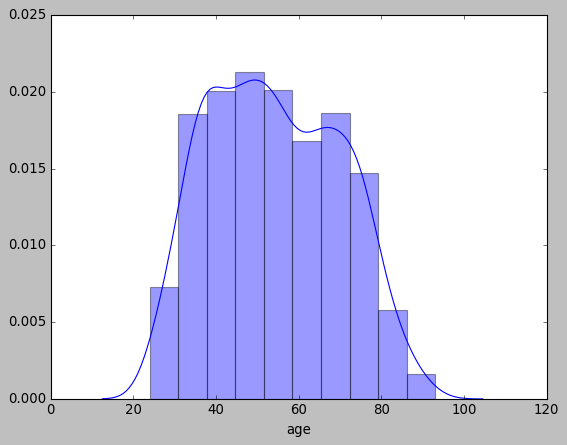

In [29]:
sns.distplot(df['age'], kde=True, bins=10);

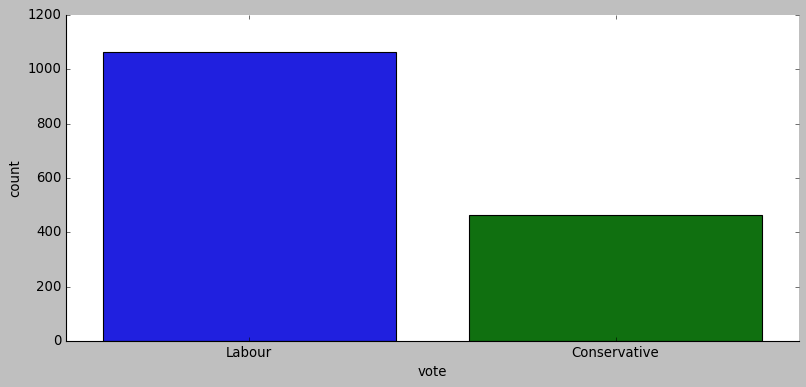

In [30]:
sns.catplot(x='vote', data=df , kind='count',aspect=2)

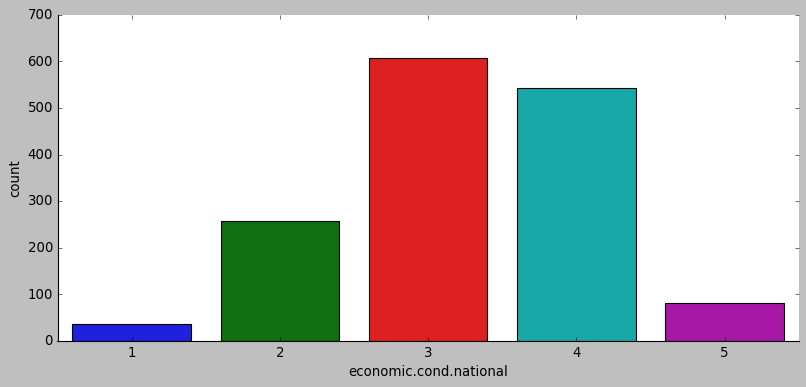

In [31]:
sns.catplot(x='economic.cond.national', data=df , kind='count',aspect=2)

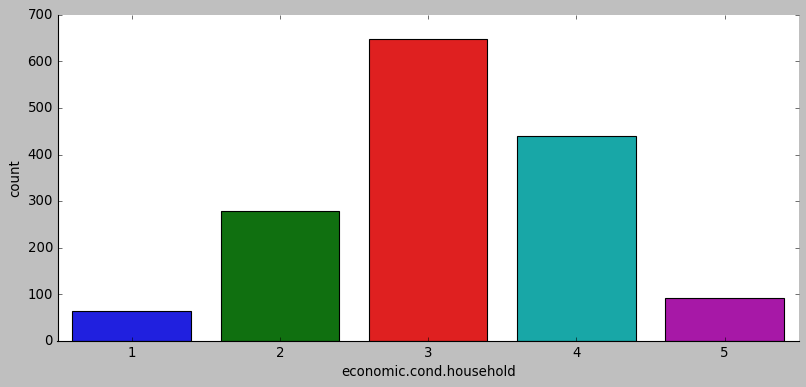

In [32]:
sns.catplot(x='economic.cond.household', data=df , kind='count',aspect=2)

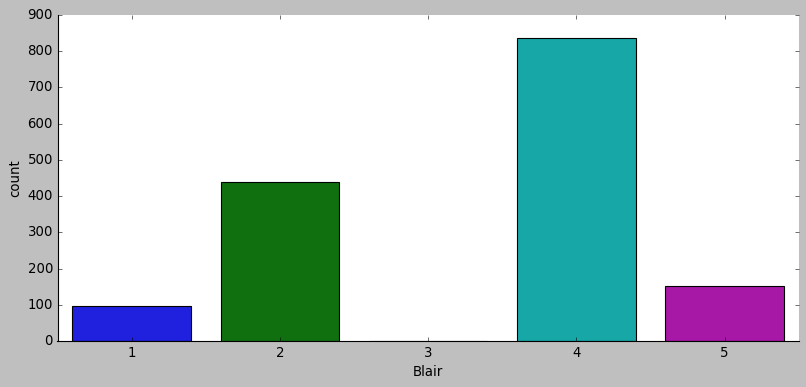

In [33]:
sns.catplot(x='Blair', data=df , kind='count',aspect=2)

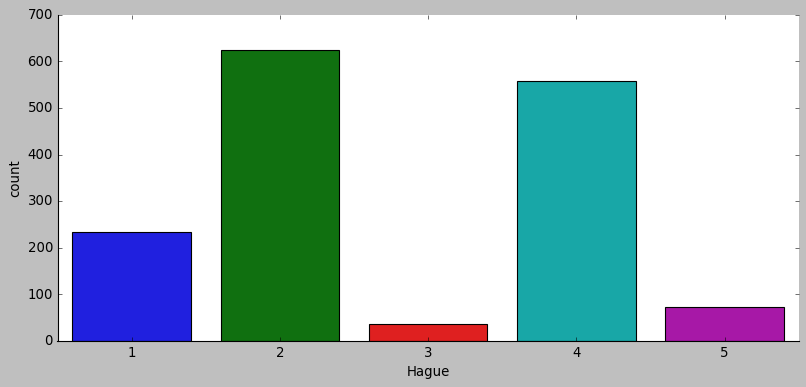

In [34]:
sns.catplot(x='Hague', data=df , kind='count',aspect=2)

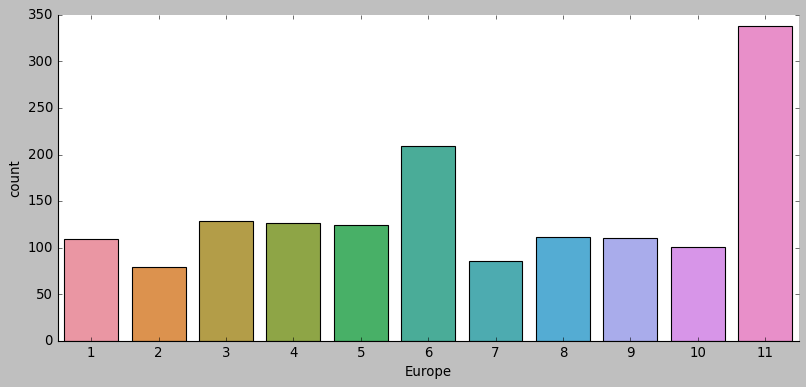

In [35]:
sns.catplot(x='Europe', data=df , kind='count',aspect=2)

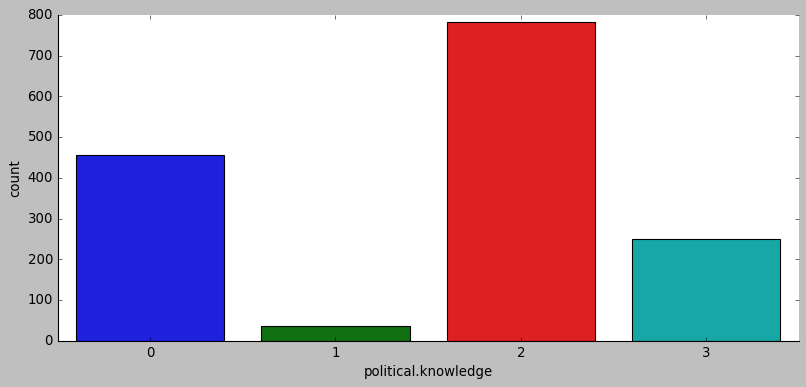

In [36]:
sns.catplot(x='political.knowledge', data=df , kind='count',aspect=2)

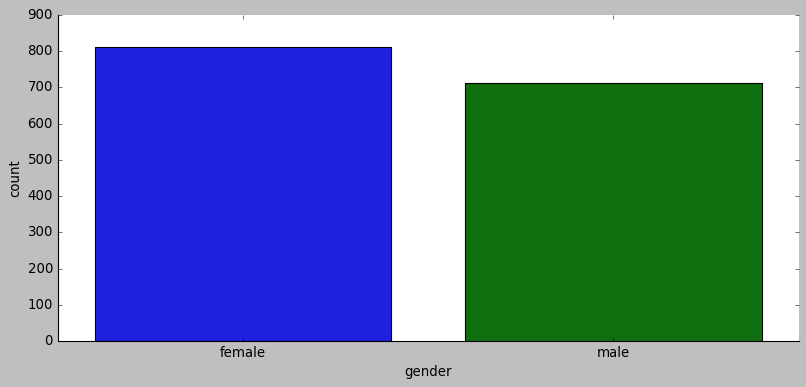

In [37]:
sns.catplot(x='gender', data=df , kind='count',aspect=2)

Bivariate Analysis with Target variable

In [38]:
['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']

['vote',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge',
 'gender']

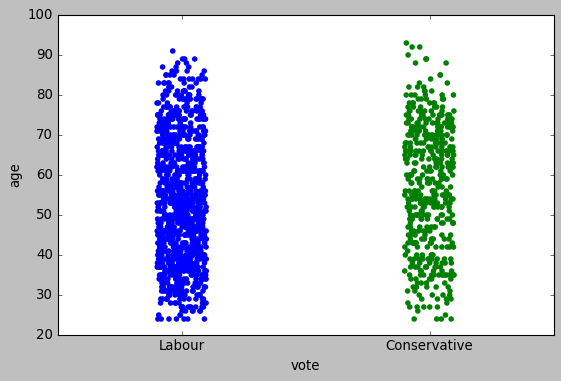

In [39]:
plt.figure(figsize=(8,5))
sns.stripplot(df["vote"], df['age'], jitter=True) 
plt.show()

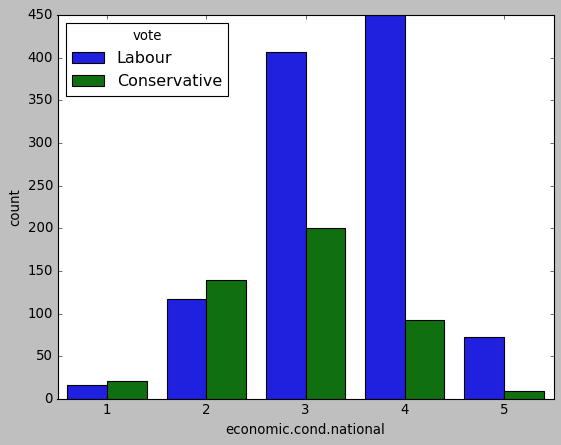

In [40]:
sns.countplot(df['economic.cond.national'],hue=df['vote'])

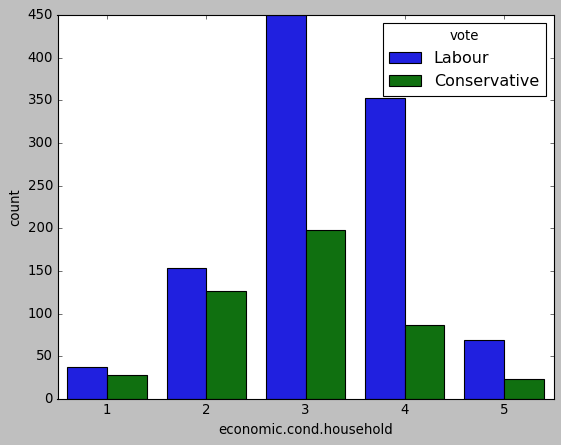

In [41]:
sns.countplot(df['economic.cond.household'],hue=df['vote'])

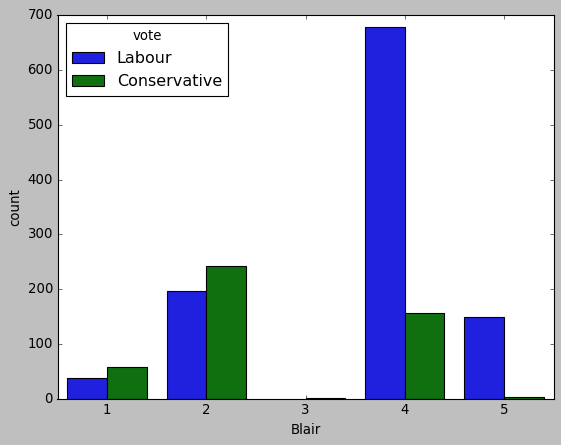

In [42]:
sns.countplot(df['Blair'],hue=df['vote'])

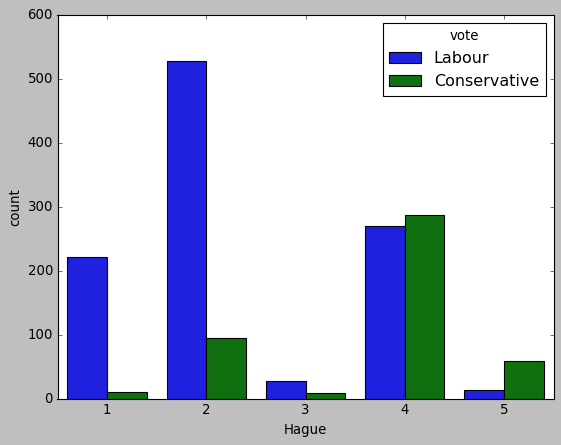

In [43]:
sns.countplot(df['Hague'],hue=df['vote'])

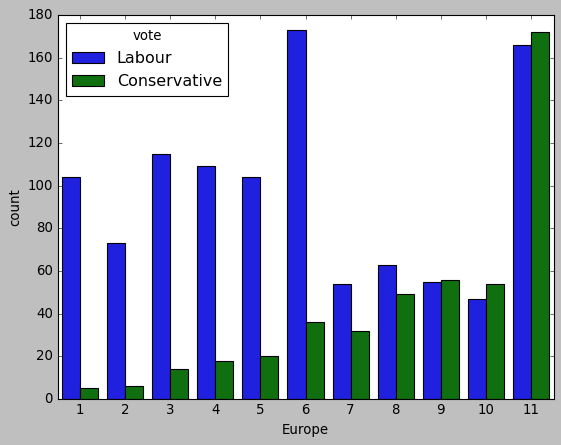

In [44]:
sns.countplot(df['Europe'],hue=df['vote'])

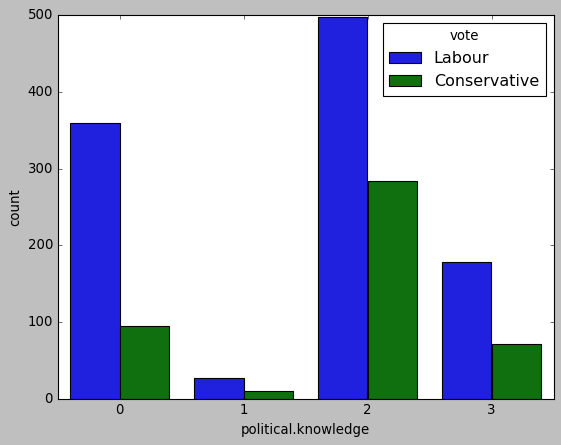

In [45]:
sns.countplot(df['political.knowledge'],hue=df['vote'])

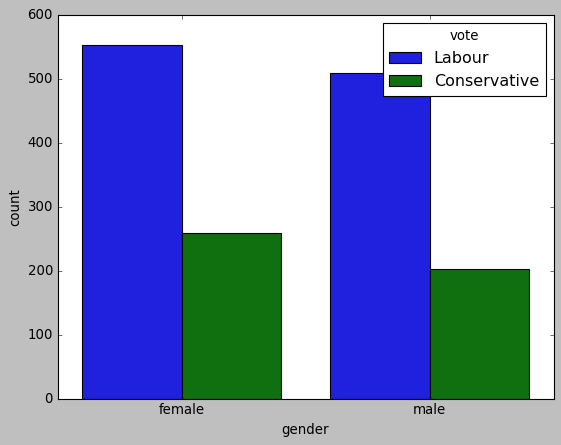

In [46]:
sns.countplot(df['gender'],hue=df['vote'])

Bi-Variate Analysis

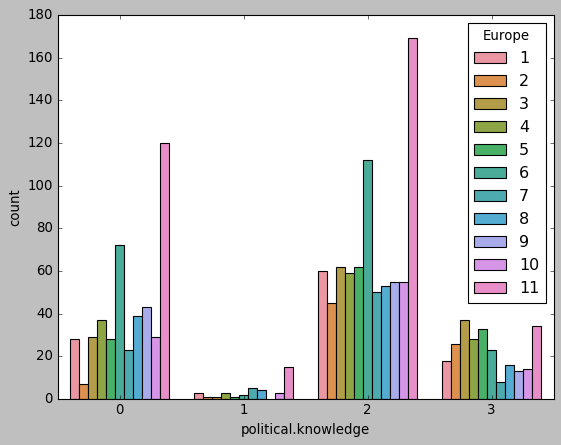

In [47]:
sns.countplot(df['political.knowledge'],hue=df['Europe'])

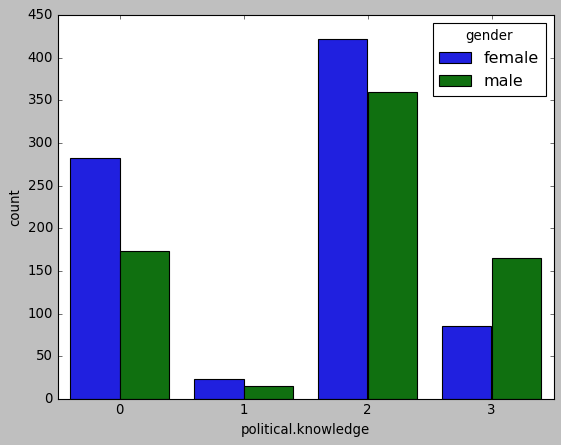

In [48]:
sns.countplot(df['political.knowledge'],hue=df['gender'])

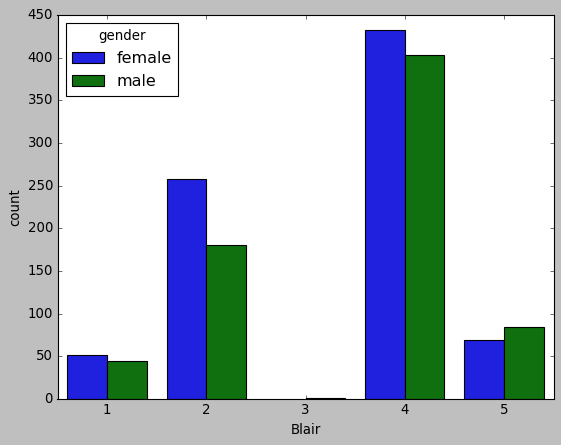

In [49]:
sns.countplot(df['Blair'],hue=df['gender'])

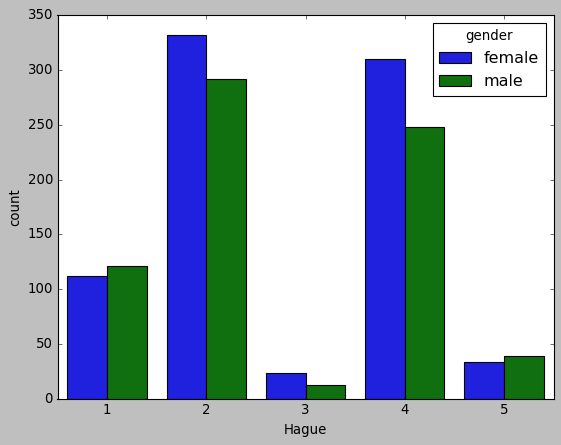

In [50]:
sns.countplot(df['Hague'],hue=df['gender'])

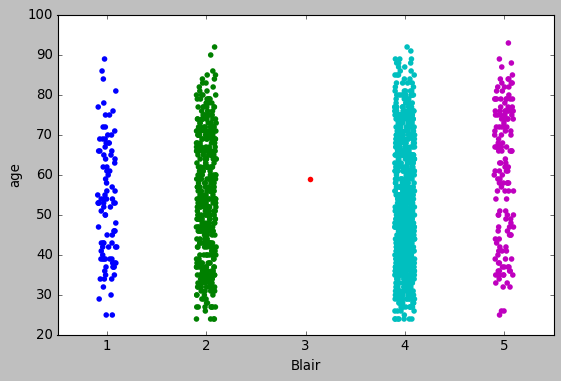

In [51]:
plt.figure(figsize=(8,5))
sns.stripplot(df["Blair"], df['age'], jitter=True) 
plt.show()

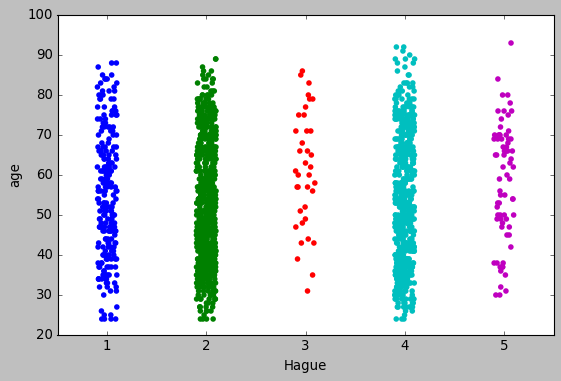

In [52]:
plt.figure(figsize=(8,5))
sns.stripplot(df["Hague"], df['age'], jitter=True) 
plt.show()

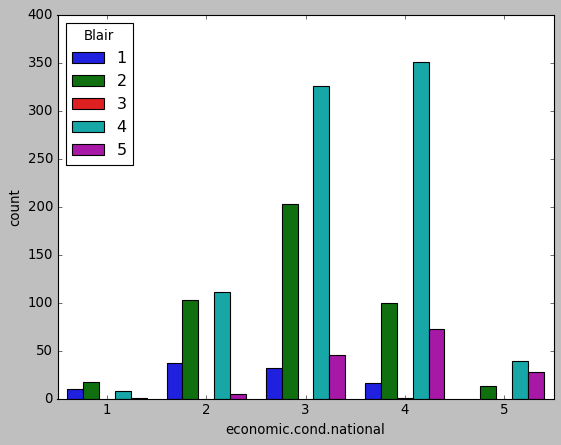

In [53]:
sns.countplot(df['economic.cond.national'],hue=df['Blair'])

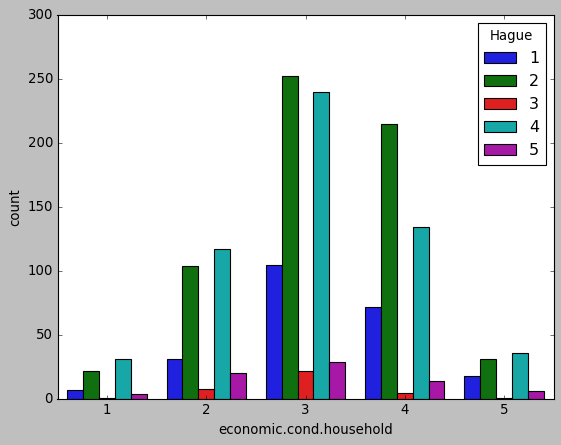

In [54]:
sns.countplot(df['economic.cond.household'],hue=df['Hague'])

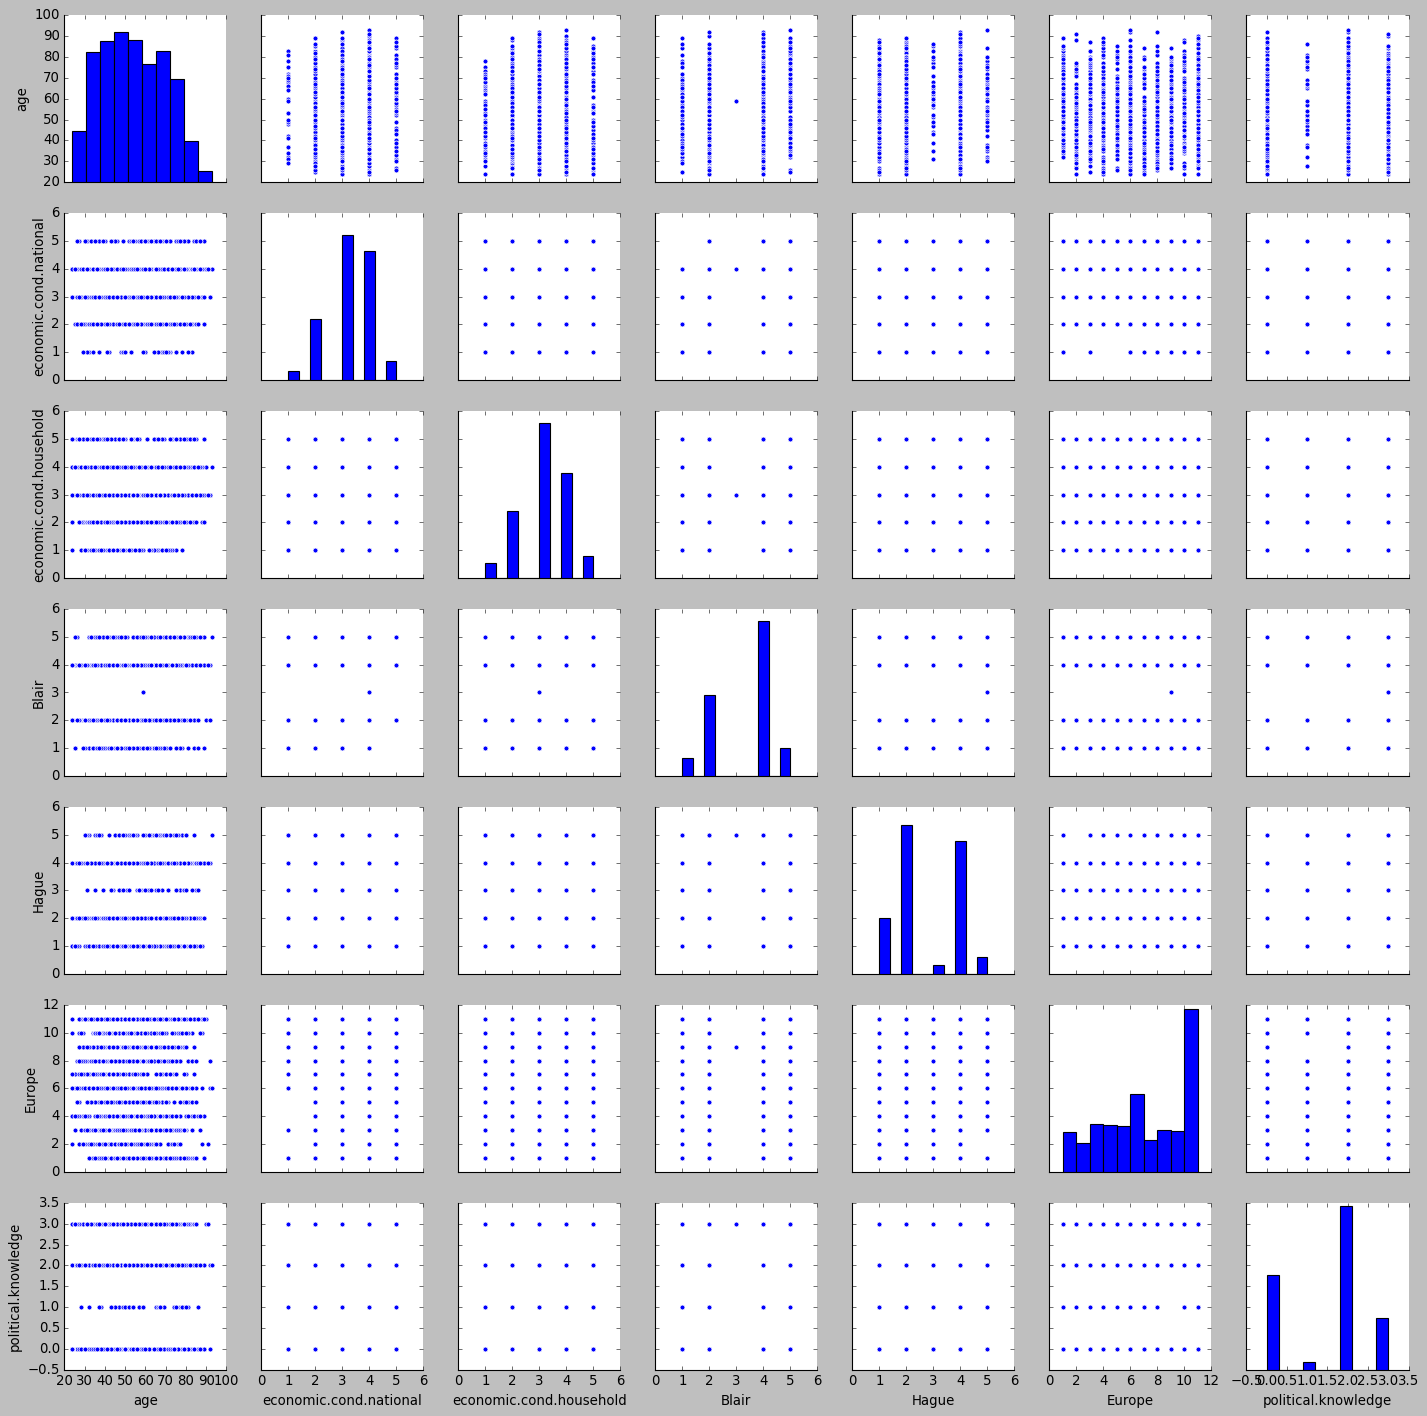

In [55]:
sns.pairplot(df)

Outlier Check

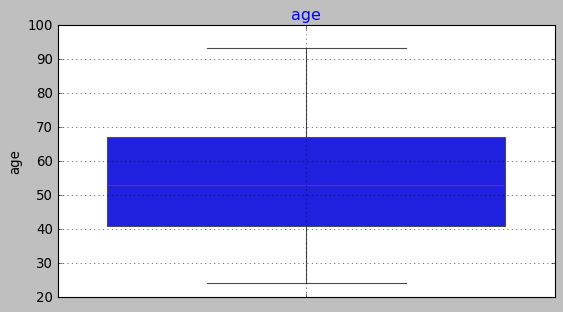

In [56]:
continuous=df.dtypes[(df.dtypes=='int64')|(df.dtypes=='float64')].index
data_plot=df[continuous]
fig=plt.figure(figsize=(20,15))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(y=data_plot[data_plot.columns[i]])
    ax.set_title(data_plot.columns[i],color='Blue')
    plt.grid()
plt.tight_layout()

The only continous column "age" does not seem to have any outliers



In [57]:
#### get_dummies of the object variables

In [58]:
print(cat)

['vote', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


In [59]:
cat.remove('vote')

Drop First is used to ensure that multiple columns created based on the levels of categorical variable are not included else it will result in to multicollinearity . This is done to ensure that we do not land in to dummy trap.

In [60]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: vote
[Labour, Conservative]
Categories (2, object): [Conservative, Labour]
[1 0]


feature: economic.cond.national
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[2 3 1 0 4]


feature: economic.cond.household
[3, 4, 2, 1, 5]
Categories (5, int64): [1, 2, 3, 4, 5]
[2 3 1 0 4]


feature: Blair
[4, 5, 2, 1, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[3 4 1 0 2]


feature: Hague
[1, 4, 2, 5, 3]
Categories (5, int64): [1, 2, 3, 4, 5]
[0 3 1 4 2]


feature: Europe
[2, 5, 3, 4, 6, ..., 1, 7, 9, 10, 8]
Length: 11
Categories (11, int64): [1, 2, 3, 4, ..., 8, 9, 10, 11]
[ 1  4  2  3  5 10  0  6  8  9  7]


feature: political.knowledge
[2, 0, 3, 1]
Categories (4, int64): [0, 1, 2, 3]
[2 0 3 1]


feature: gender
[female, male]
Categories (2, object): [female, male]
[0 1]


In [61]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,2,2,3,0,1,2,0
1,1,36,3,3,3,3,4,2,1
2,1,35,3,3,4,1,2,2,1
3,1,24,3,1,1,0,3,0,0
4,1,41,1,1,0,0,5,2,1


Scaling the variables as continuous variables have different weightage using min-max technique

In [62]:
num.remove('Unnamed: 0')

In [63]:
print(num)

['age']


In [64]:
df[num] = df[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [65]:
## Check if the variables have been scaled or not
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,0.275362,2,2,3,0,1,2,0
1,1,0.173913,3,3,3,3,4,2,1
2,1,0.159420,3,3,4,1,2,2,1
3,1,0.000000,3,1,1,0,3,0,0
4,1,0.246377,1,1,0,0,5,2,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote                     1525 non-null   int8   
 1   age                      1525 non-null   float64
 2   economic.cond.national   1525 non-null   int8   
 3   economic.cond.household  1525 non-null   int8   
 4   Blair                    1525 non-null   int8   
 5   Hague                    1525 non-null   int8   
 6   Europe                   1525 non-null   int8   
 7   political.knowledge      1525 non-null   int8   
 8   gender                   1525 non-null   int8   
dtypes: float64(1), int8(8)
memory usage: 24.0 KB


Train-Test Split

In [67]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [71]:
# Copy all the predictor variables into X dataframe
X = df.drop('vote', axis=1)

# Copy target into the y dataframe.  
y = df['vote']

In [74]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,2,2,3,0,1,2,0
1,0.173913,3,3,3,3,4,2,1
2,0.159420,3,3,4,1,2,2,1
3,0.000000,3,1,1,0,3,0,0
4,0.246377,1,1,0,0,5,2,1


In [72]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote, dtype: int8

In [73]:
# Encode for string labels
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder().fit(y)
y = pd.DataFrame(label_encoder.transform(y),columns = ["vote"])

In [80]:
y.tail(5)

,vote
1520,0
1521,0
1522,1
1523,0
1524,0


In [77]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [78]:
X_train.shape

(1067, 8)

In [79]:
y_train.shape

(1067, 1)

In [81]:
X_test.shape

(458, 8)

In [82]:
y_test.shape

(458, 1)

Models

Logistic Regression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [84]:
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [85]:
print(LR_model.coef_, LR_model.intercept_)

[[-1.23211617  0.33297713  0.16084573  0.56716628 -0.8300607  -0.23826143
  -0.47465778  0.29183078]] [2.8343617]


In [87]:
X.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [88]:
## Performance Matrix on train data set
y_train_predict = LR_model.predict(X_train)
model_score = LR_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8406747891283973
[[230 102]
 [ 68 667]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       332
           1       0.87      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [104]:
from sklearn.metrics import roc_auc_score,roc_curve


AUC: 0.889


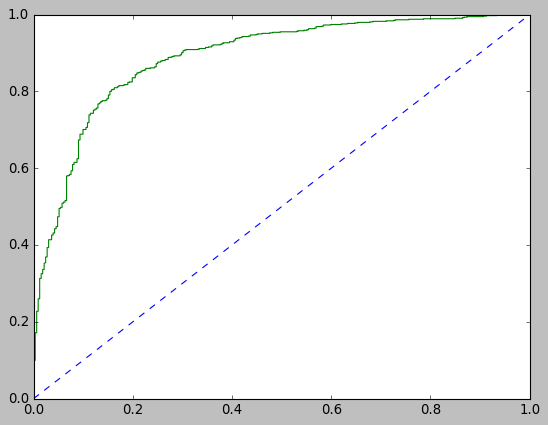

In [105]:
#AUC and ROC for the training data
# predict probabilities
probs = LR_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_train_fpr, lr_train_tpr)

In [106]:
## Performance Matrix on test data set
y_test_predict = LR_model.predict(X_test)
model_score = LR_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



In [100]:
from sklearn.metrics import roc_auc_score

AUC: 0.883


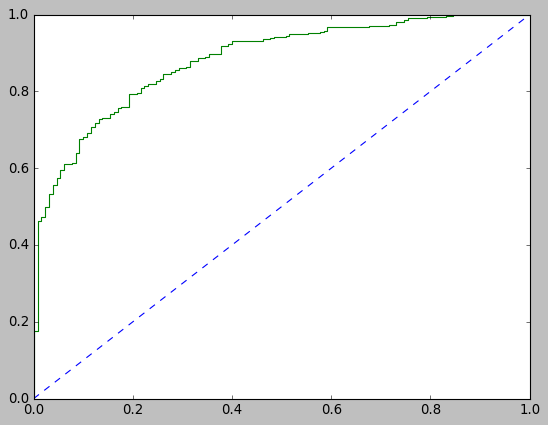

In [107]:
# AUC and ROC for the test data
# predict probabilities
probs = LR_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
lr_test_fpr, lr_test_tpr, lr_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_test_fpr, lr_test_tpr)

Linear Discriminant Analysis

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [109]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.889


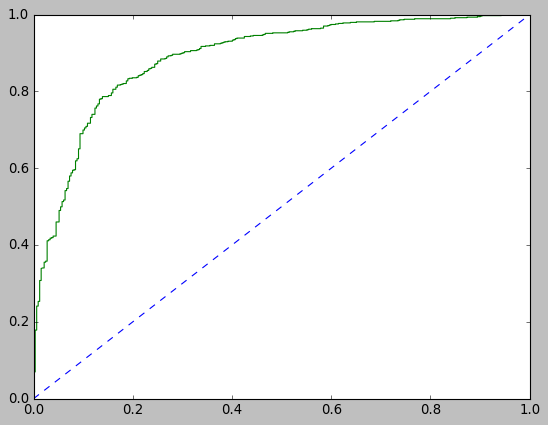

In [110]:
#AUC and ROC for the training data
# predict probabilities
probs = LDA_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
# calculate roc curve
lda_train_fpr, lda_train_tpr, lda_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_train_fpr, lda_train_tpr)

In [111]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.884


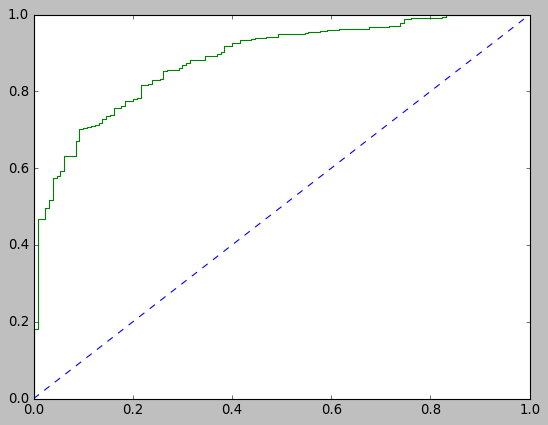

In [112]:
# AUC and ROC for the test data
# predict probabilities
probs = LDA_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
# calculate roc curve
lda_test_fpr, lda_test_tpr, lda_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_test_fpr, lda_test_tpr)

KNN Model

In [113]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

<ipython-input-113-86c9f448a5fe>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  KNN_model.fit(X_train,y_train)


KNeighborsClassifier()

In [114]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8612933458294283
[[250  82]
 [ 66 669]]
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       332
           1       0.89      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.83      0.84      1067
weighted avg       0.86      0.86      0.86      1067



AUC: 0.933


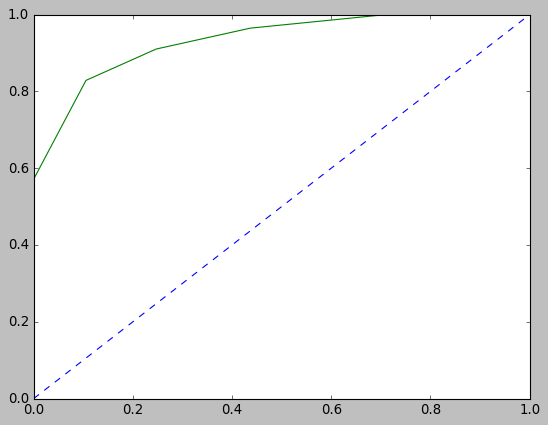

In [115]:
#AUC and ROC for the training data
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_train_auc)
# calculate roc curve
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_train_fpr, knn_train_tpr)

In [116]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8013100436681223
[[ 91  39]
 [ 52 276]]
              precision    recall  f1-score   support

           0       0.64      0.70      0.67       130
           1       0.88      0.84      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.77      0.76       458
weighted avg       0.81      0.80      0.80       458



AUC: 0.855


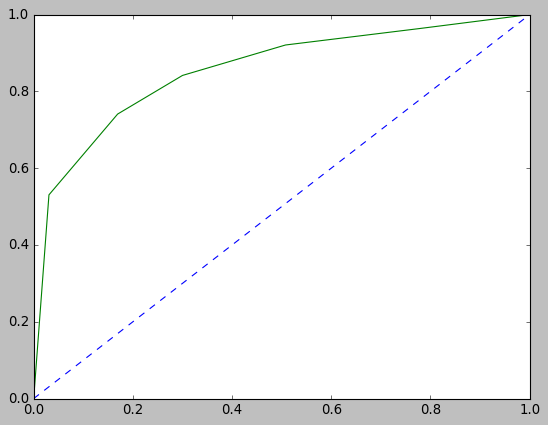

In [117]:
# AUC and ROC for the test data
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_test_auc)
# calculate roc curve
knn_test_fpr, knn_test_tpr, knn_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_test_fpr, knn_test_tpr)

Naive Bayes Model

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [120]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [121]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8331771321462043
[[240  92]
 [ 86 649]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



AUC: 0.886


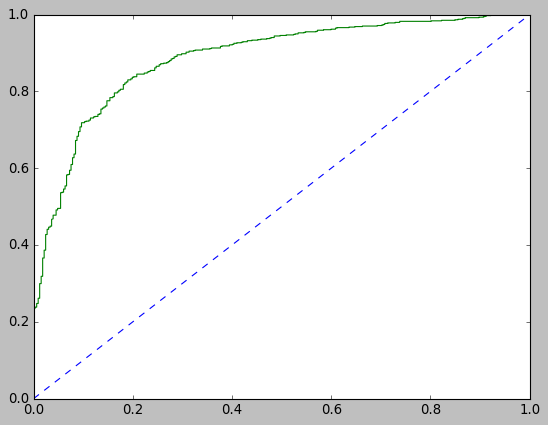

In [122]:
#AUC and ROC for the training data
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % nb_train_auc)
# calculate roc curve
nb_train_fpr, nb_train_tpr, nb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_train_fpr, nb_train_tpr)

In [123]:
y_test.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [124]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8253275109170306
[[ 94  36]
 [ 44 284]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.885


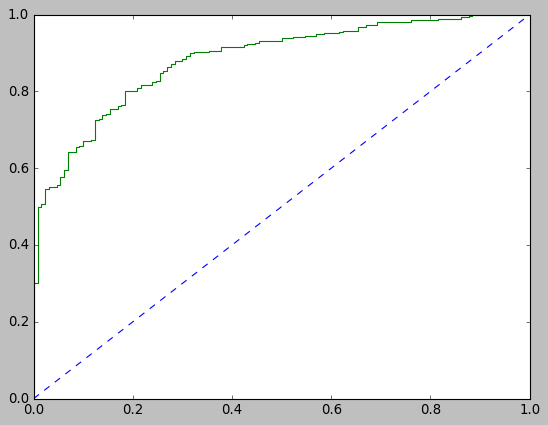

In [125]:
# AUC and ROC for the test data
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
nb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % nb_test_auc)
# calculate roc curve
nb_test_fpr, nb_test_tpr, nb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(nb_test_fpr, nb_test_tpr)

SVM

In [126]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1,probability=True)
SVM_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(probability=True, random_state=1)

In [127]:
## Performance Matrix on train data set
y_train_predict = SVM_model.predict(X_train)
model_score = SVM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8388003748828491
[[221 111]
 [ 61 674]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.84      0.84      0.83      1067



AUC: 0.900


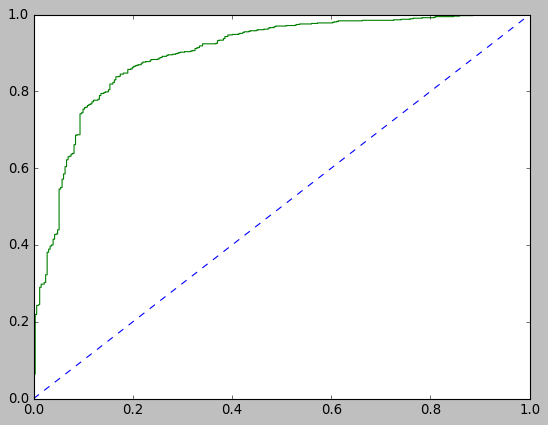

In [128]:
#AUC and ROC for the training data
# predict probabilities
probs = SVM_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_train_auc)
# calculate roc curve
svm_train_fpr, svm_train_tpr, svm_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_train_fpr, svm_train_tpr)

In [129]:
## Performance Matrix on test data set
y_test_predict = SVM_model.predict(X_test)
model_score = SVM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 83  47]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       130
           1       0.86      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.76      0.77       458
weighted avg       0.81      0.82      0.82       458



AUC: 0.888


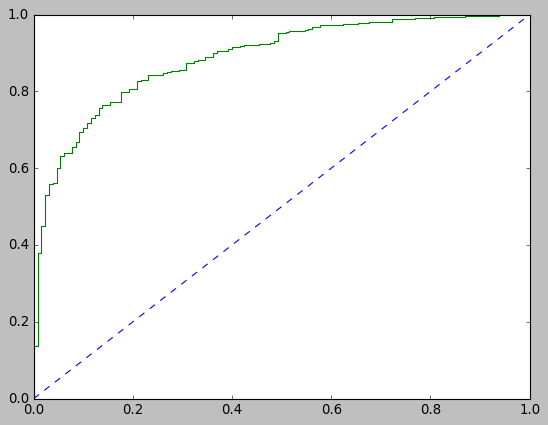

In [130]:
# AUC and ROC for the test data
# predict probabilities
probs = SVM_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_test_auc)
# calculate roc curve
svm_test_fpr, svm_test_tpr, svm_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_test_fpr, svm_test_tpr)

Model Tuninig

Logistic Regression

In [133]:
X_train_fs = X_train.drop(['economic.cond.national', 'gender'], axis=1)

X_test_fs = X_test.drop(['economic.cond.national', 'gender'], axis=1)

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
# LogisticRegression Parameters tunning 
LRM = LogisticRegression(random_state = 1)

## Search grid for optimal parameters
lr_param_grid = {"penalty" : ["l2","l1"],
              "tol" : [0.01,0.001,0.5],
              "max_iter": [100,110],
              "C" :[50,100,150],
              "intercept_scaling": [1, 2, 3, 4],
              "solver":['liblinear']}


gsLRM = GridSearchCV(LRM, param_grid = lr_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1, cv = 5)

In [136]:
# Fit the Logistic Regression model
#lr_model = LogisticRegression(solver='liblinear',max_iter=100,verbose=True,n_jobs=1)
#model = LogisticRegression()
gsLRM.fit(X_train_fs, y_train)
lr_model_tun = gsLRM.best_estimator_
lr_model_tun

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 120 tasks      | elapsed:   28.2s
[Parallel(n_jobs=2)]: Done 720 out of 720 | elapsed:   32.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=50, intercept_scaling=2, random_state=1,
                   solver='liblinear', tol=0.01)

In [137]:
## Performance Matrix on train data set
y_train_predict = lr_model_tun.predict(X_train_fs)
model_score = lr_model_tun.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8406747891283973
[[227 105]
 [ 65 670]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.73       332
           1       0.86      0.91      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



In [138]:
print(lr_model_tun.coef_, lr_model_tun.intercept_)

[[-1.41075653  0.25889435  0.62646704 -0.85088218 -0.24278197 -0.46412891]] [3.47449786]


In [139]:
X_train_fs.columns

Index(['age', 'economic.cond.household', 'Blair', 'Hague', 'Europe',
       'political.knowledge'],
      dtype='object')

AUC: 0.886


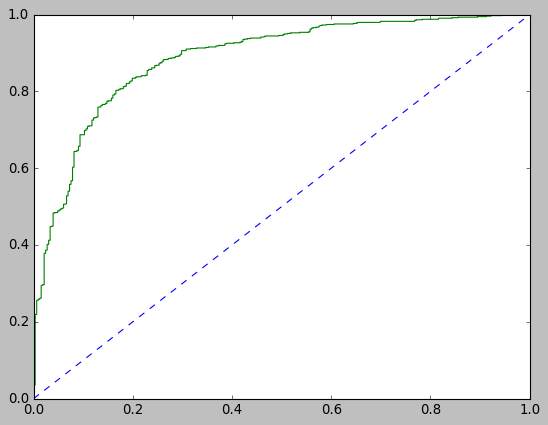

In [140]:
#AUC and ROC for the training data
# predict probabilities
probs = lr_model_tun.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_tun_train_auc)
# calculate roc curve
lr_tun_train_fpr, lr_tun_train_tpr, lr_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr)

In [141]:
## Performance Matrix on test data set
y_test_predict = lr_model_tun.predict(X_test_fs)
model_score = lr_model_tun.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 85  45]
 [ 36 292]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.68       130
           1       0.87      0.89      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.878


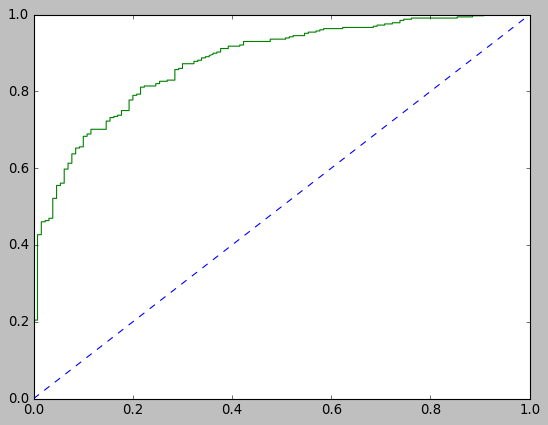

In [142]:
# AUC and ROC for the test data
# predict probabilities
probs = lr_model_tun.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_tun_test_auc)
# calculate roc curve
lr_tun_test_fpr, lr_tun_test_tpr, lr_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr)

Linear Discriminant Analysis

In [145]:
LDAM = LinearDiscriminantAnalysis()

lda_param_grid = {"solver" : ["svd","lsqr", "eigen"],
              "tol" : [0.0001,0.0002,0.0003]
}

gsLDAM = GridSearchCV(LDAM, param_grid = lda_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1, cv = 5)


In [144]:
gsLDAM.fit(X_train, y_train)
lda_model_tun = gsLDAM.best_estimator_
lda_model_tun

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:   20.0s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [146]:
## Performance Matrix on train data set
y_train_predict = lda_model_tun.predict(X_train)
model_score = lda_model_tun.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[233  99]
 [ 75 660]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       332
           1       0.87      0.90      0.88       735

    accuracy                           0.84      1067
   macro avg       0.81      0.80      0.81      1067
weighted avg       0.83      0.84      0.84      1067



AUC: 0.889


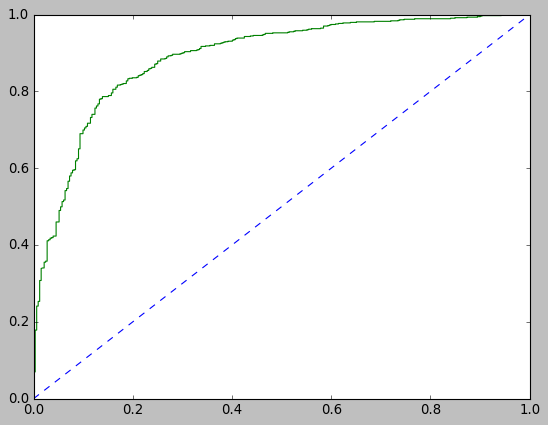

In [147]:

#AUC and ROC for the training data
# predict probabilities
probs = lda_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_tun_train_auc)
# calculate roc curve
lda_tun_train_fpr, lda_tun_train_tpr, lda_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_train_fpr, lda_tun_train_tpr)

In [148]:
# Performance Matrix on test data set
y_test_predict = lda_model_tun.predict(X_test)
model_score = lda_model_tun.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 86  44]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       130
           1       0.87      0.88      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.77      0.77       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.884


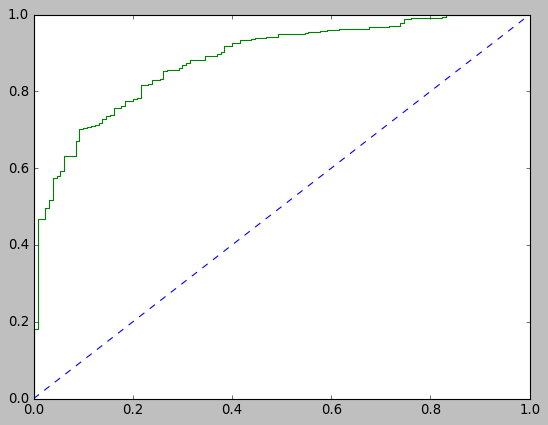

In [149]:
# AUC and ROC for the test data
# predict probabilities
probs = lda_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lda_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_tun_test_auc)
# calculate roc curve
lda_tun_test_fpr, lda_tun_test_tpr, lda_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(lda_tun_test_fpr, lda_tun_test_tpr)

KNN Model

In [152]:
KNNM = KNeighborsClassifier()

knn_param_grid = {
'n_neighbors': [6,7,8],
'weights': ['uniform', 'distance'],
'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
'leaf_size' : [1,2,3] ,
'p' : [1,2]
}

gsKNNM = GridSearchCV(KNNM, param_grid = knn_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1, cv =5)

In [153]:
gsKNNM.fit(X_train, y_train)
knn_model_tun = gsKNNM.best_estimator_
knn_model_tun

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 104 tasks      | elapsed:    6.3s
[Parallel(n_jobs=2)]: Done 704 tasks      | elapsed:   16.7s
[Parallel(n_jobs=2)]: Done 720 out of 720 | elapsed:   16.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


KNeighborsClassifier(leaf_size=1, n_neighbors=7)

In [154]:
## Performance Matrix on train data set
y_train_predict = knn_model_tun.predict(X_train)
model_score = knn_model_tun.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8556701030927835
[[245  87]
 [ 67 668]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       332
           1       0.88      0.91      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.85      0.86      0.85      1067



AUC: 0.925


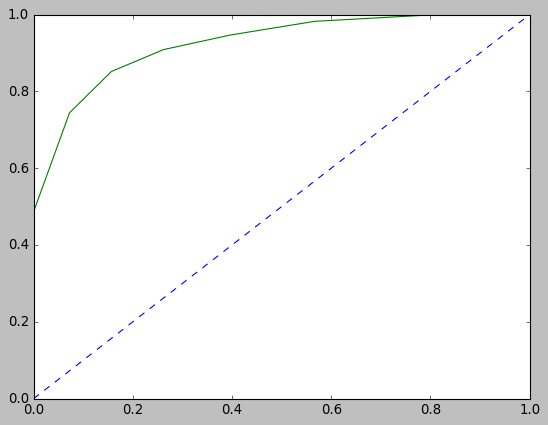

In [155]:
#AUC and ROC for the training data
# predict probabilities
probs = knn_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % knn_tun_train_auc)
# calculate roc curve
knn_tun_train_fpr, knn_tun_train_tpr, knn_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_train_fpr, knn_tun_train_tpr)

In [156]:
## Performance Matrix on test data set
y_test_predict = knn_model_tun.predict(X_test)
model_score = knn_model_tun.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7969432314410481
[[ 87  43]
 [ 50 278]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.65       130
           1       0.87      0.85      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.76      0.75       458
weighted avg       0.80      0.80      0.80       458



AUC: 0.870


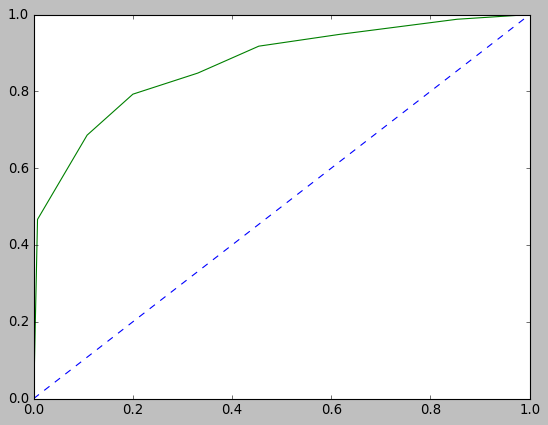

In [157]:
# AUC and ROC for the test data
# predict probabilities
probs = knn_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % knn_tun_test_auc)
# calculate roc curve
knn_tun_test_fpr, knn_tun_test_tpr, knn_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(knn_tun_test_fpr, knn_tun_test_tpr)

Naive Bayes Model


There are no parameters to tune for Naive Bayes

SVM

In [162]:
SVMM= svm.SVC(random_state=1,probability=True)

svm_param_grid = {
'C': [0.01, 0.1, 1.0],
'kernel': ['linear'],
'gamma': [0.1,0.05,0.2],
'tol' : [0.01,0.05]
}


gsSVMM = GridSearchCV(SVMM, param_grid = svm_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1, cv =5)

In [161]:
gsSVMM.fit(X_train, y_train)
svm_model_tun = gsSVMM.best_estimator_
svm_model_tun

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    4.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.1, gamma=0.1, kernel='linear', probability=True, random_state=1,
    tol=0.01)

In [164]:
## Performance Matrix on train data set
y_train_predict = svm_model_tun.predict(X_train)
model_score = svm_model_tun.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8416119962511716
[[234  98]
 [ 71 664]]
              precision    recall  f1-score   support

           0       0.77      0.70      0.73       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



AUC: 0.888


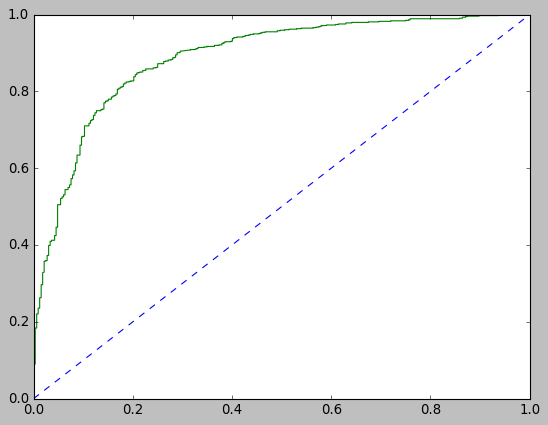

In [165]:
#AUC and ROC for the training data
# predict probabilities
probs = svm_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % svm_tun_train_auc)
# calculate roc curve
svm_tun_train_fpr, svm_tun_train_tpr, svm_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_train_fpr, svm_tun_train_tpr)

In [166]:
## Performance Matrix on test data set
y_test_predict = svm_model_tun.predict(X_test)
model_score = svm_model_tun.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8231441048034934
[[ 87  43]
 [ 38 290]]
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       130
           1       0.87      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.880


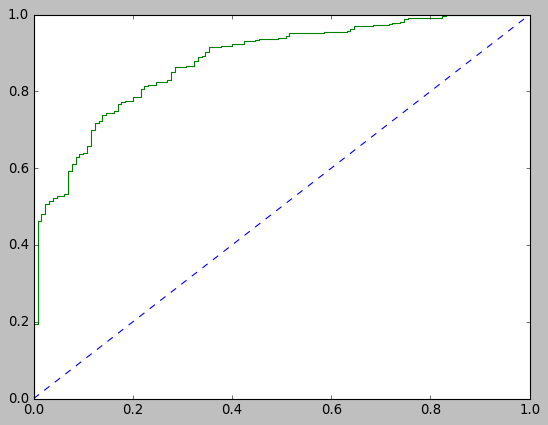

In [167]:
# AUC and ROC for the test data
# predict probabilities
probs = svm_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % svm_tun_test_auc)
# calculate roc curve
svm_tun_test_fpr, svm_tun_test_tpr, svm_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(svm_tun_test_fpr, svm_tun_test_tpr)

Basic Bagging and Boosting Models

Bagging

In [170]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(random_state=1)
Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=50,random_state=1)
Bagging_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=50, random_state=1)

In [171]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9643861293345829
[[301  31]
 [  7 728]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       332
           1       0.96      0.99      0.97       735

    accuracy                           0.96      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.96      0.96      0.96      1067



AUC: 0.997


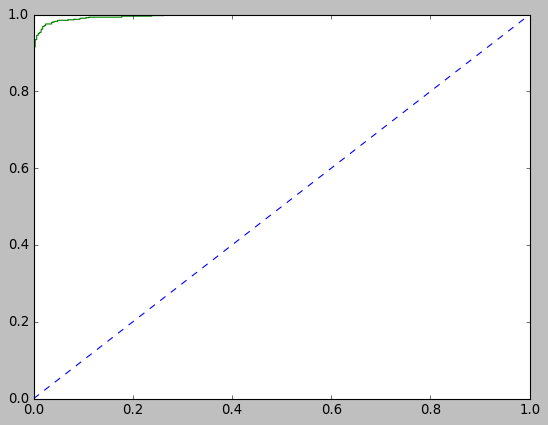

In [172]:
#AUC and ROC for the training data
# predict probabilities
probs = Bagging_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_train_auc)
# calculate roc curve
bag_train_fpr, bag_train_tpr, bag_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_train_fpr, bag_train_tpr)

In [173]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.834061135371179
[[ 92  38]
 [ 38 290]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.80      0.80      0.80       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.897


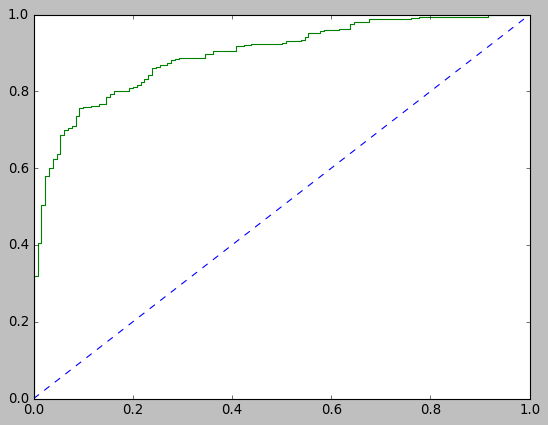

In [174]:
# AUC and ROC for the test data
# predict probabilities
probs = Bagging_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_test_auc)
# calculate roc curve
bag_test_fpr, bag_test_tpr, bag_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_test_fpr, bag_test_tpr)

XGBoost

In [184]:
X_train_fs = X_train.drop(['economic.cond.national', 'economic.cond.household', 
       'Europe', 'political.knowledge', 'gender'], axis=1)

X_test_fs = X_test.drop(['economic.cond.national', 'economic.cond.household', 
       'Europe', 'political.knowledge', 'gender'], axis=1)

In [187]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost

  Using cached xgboost-1.4.2-py3-none-win_amd64.whl (97.8 MB)


In [188]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1)
XGB_model.fit(X_train_fs, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[19:30:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [189]:
## Performance Matrix on train data set
y_train_predict = XGB_model.predict(X_train_fs)
model_score = XGB_model.score(X_train_fs, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8528584817244611
[[244  88]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.82      0.83      1067
weighted avg       0.85      0.85      0.85      1067



AUC: 0.931


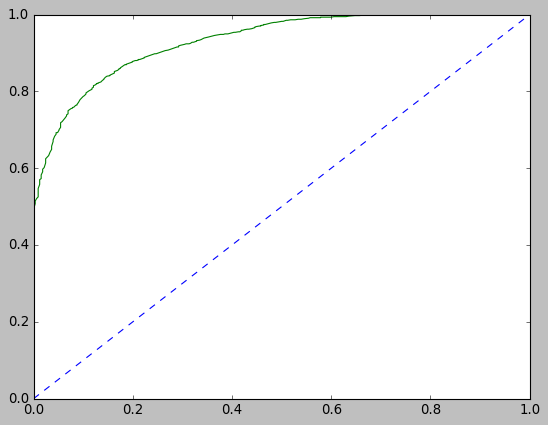

In [190]:
#AUC and ROC for the training data
# predict probabilities
probs = XGB_model.predict_proba(X_train_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
xgb_train_fpr, xgb_train_tpr, xgb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr)

In [192]:
## Performance Matrix on test data set
y_test_predict = XGB_model.predict(X_test_fs)
model_score = XGB_model.score(X_test_fs, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7947598253275109
[[ 82  48]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.64      0.63      0.64       130
           1       0.85      0.86      0.86       328

    accuracy                           0.79       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.79      0.79      0.79       458



AUC: 0.835


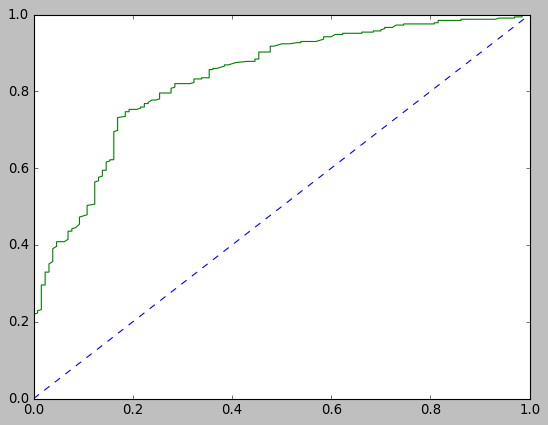

In [193]:
# AUC and ROC for the test data
# predict probabilities
probs = XGB_model.predict_proba(X_test_fs)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
xgb_test_fpr, xgb_test_tpr, xgb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr)

In [194]:
pd.DataFrame({'Variable':X_train_fs.columns,
              'Importance':XGB_model.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
2,Hague,0.557733
1,Blair,0.353927
0,age,0.088340


Ada Boost

In [226]:
from sklearn.ensemble import AdaBoostClassifier

ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(n_estimators=100, random_state=1)

In [227]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



AUC: 0.913


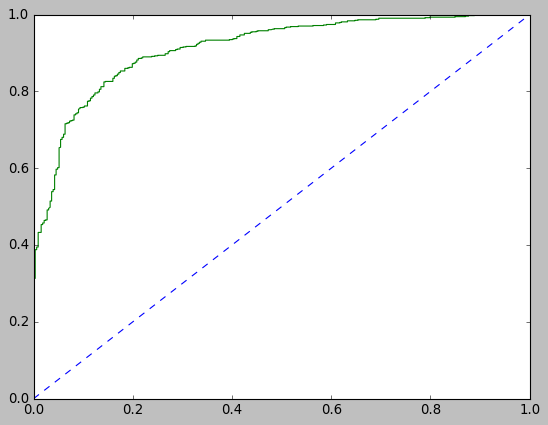

In [229]:
#AUC and ROC for the training data
# predict probabilities
probs = ADB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_train_auc)
# calculate roc curve
adb_train_fpr, adb_train_tpr, adb_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_train_fpr, adb_train_tpr)

In [230]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



AUC: 0.879


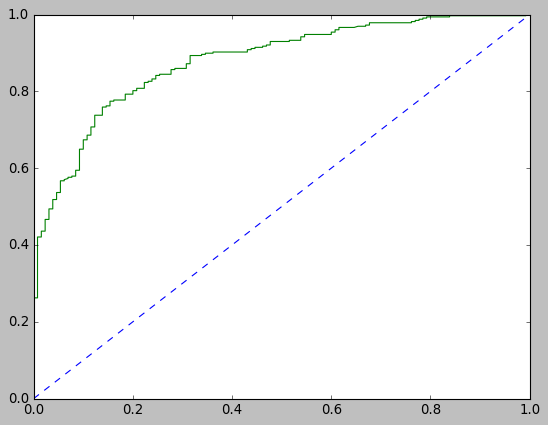

In [231]:
# AUC and ROC for the test data
# predict probabilities
probs = ADB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_test_auc)
# calculate roc curve
adb_test_fpr, adb_test_tpr, adb_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_test_fpr, adb_test_tpr)

Observing the feature importance

In [232]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':xgbm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,Hague,0.320234
3,Blair,0.158256
5,Europe,0.138685
6,political.knowledge,0.114458
1,economic.cond.national,0.086892
0,age,0.065085
2,economic.cond.household,0.062624
7,gender,0.053766


Tuned Bagging and Boosting models

Bagging Model

In [197]:
BAGGING = BaggingClassifier(RandomForestClassifier(random_state=1))

bagging_param_grid = {
    'base_estimator__max_depth' : [1, 5],
    'max_samples' : [0.05, 0.1, 0.2],
    'n_estimators' : [50,100,200]
}

gsBagging= GridSearchCV(BAGGING,
                   bagging_param_grid, scoring = "accuracy", n_jobs= 2, cv = 5, verbose=1)

In [207]:

gsBagging.fit(X_train, y_train)
bagging_model_tun = gsBagging.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 10.7min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed: 21.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [208]:
## Performance Matrix on train data set
y_train_predict = bagging_model_tun.predict(X_train)
model_score =bagging_model_tun.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8603561387066542
[[221 111]
 [ 38 697]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       332
           1       0.86      0.95      0.90       735

    accuracy                           0.86      1067
   macro avg       0.86      0.81      0.83      1067
weighted avg       0.86      0.86      0.86      1067



AUC: 0.917


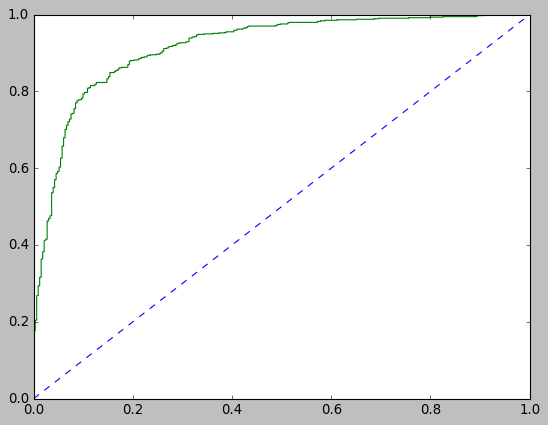

In [209]:
#AUC and ROC for the training data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % bag_tun_train_auc)
# calculate roc curve
bag_tun_train_fpr, bag_tun_train_tpr, bag_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_train_fpr, bag_tun_train_tpr)

In [210]:

## Performance Matrix on test data set
y_test_predict = bagging_model_tun.predict(X_test)
model_score = bagging_model_tun.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 84  46]
 [ 29 299]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       130
           1       0.87      0.91      0.89       328

    accuracy                           0.84       458
   macro avg       0.81      0.78      0.79       458
weighted avg       0.83      0.84      0.83       458



AUC: 0.899


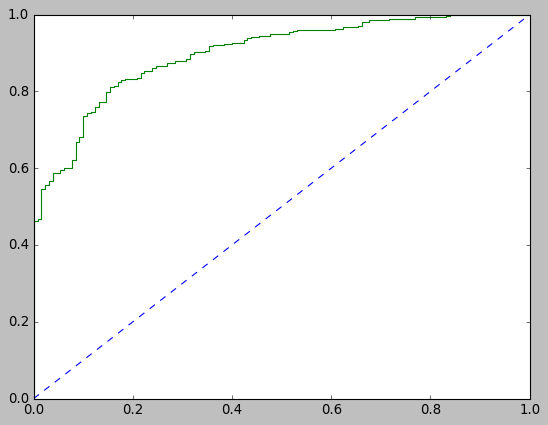

In [211]:

# AUC and ROC for the test data
# predict probabilities
probs = bagging_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
bag_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % bag_tun_test_auc)
# calculate roc curve
bag_tun_test_fpr, bag_tun_test_tpr, bag_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(bag_tun_test_fpr, bag_tun_test_tpr)

AdaBoost

In [212]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

RF = RandomForestClassifier(random_state=1)
DT = DecisionTreeClassifier(random_state=1)

ABCM = AdaBoostClassifier()

abcm_param_grid = {"n_estimators": [300,400,500],
                   "learning_rate" : [0.03,0.04,0.05]
}

gsABCM = GridSearchCV(ABCM, param_grid = abcm_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1, cv =5)

In [213]:
gsABCM.fit(X_train, y_train)
abcm_model_tun = gsABCM.best_estimator_
abcm_model_tun

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  45 out of  45 | elapsed:  1.5min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


AdaBoostClassifier(learning_rate=0.03, n_estimators=400)

In [214]:
## Performance Matrix on train data set
y_train_predict = abcm_model_tun.predict(X_train)
model_score = abcm_model_tun.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8369259606373008
[[219 113]
 [ 61 674]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72       332
           1       0.86      0.92      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.79      0.80      1067
weighted avg       0.83      0.84      0.83      1067



AUC: 0.902


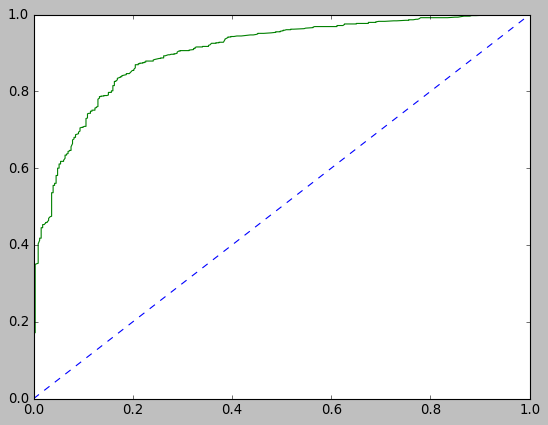

In [215]:
#AUC and ROC for the training data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % adb_tun_train_auc)
# calculate roc curve
adb_tun_train_fpr, adb_tun_train_tpr, adb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_train_fpr, adb_tun_train_tpr)

In [216]:
## Performance Matrix on test data set
y_test_predict = abcm_model_tun.predict(X_test)
model_score = abcm_model_tun.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8275109170305677
[[ 85  45]
 [ 34 294]]
              precision    recall  f1-score   support

           0       0.71      0.65      0.68       130
           1       0.87      0.90      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.78      0.78       458
weighted avg       0.82      0.83      0.83       458



AUC: 0.892


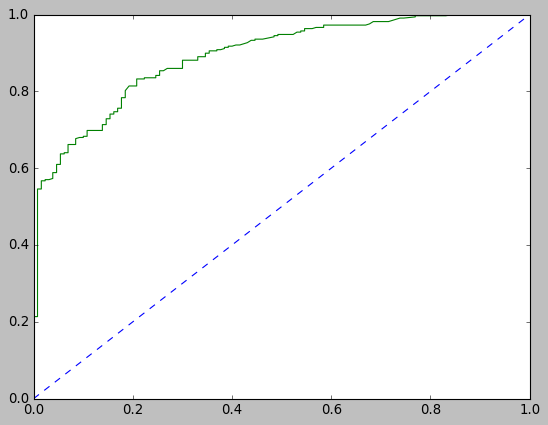

In [217]:
# AUC and ROC for the test data
# predict probabilities
probs = abcm_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
adb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % adb_tun_test_auc)
# calculate roc curve
adb_tun_test_fpr, adb_tun_test_tpr, adb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(adb_tun_test_fpr, adb_tun_test_tpr)

In [218]:
pd.DataFrame({'Variable':X_train.columns,
              'Importance':abcm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,Hague,0.2225
3,Blair,0.2075
5,Europe,0.1775
0,age,0.1425
6,political.knowledge,0.1000
1,economic.cond.national,0.0975
2,economic.cond.household,0.0525
7,gender,0.0000


XGBoost

In [219]:
import xgboost as xgb
XGBM = xgb.XGBClassifier(random_state=1)

xgbm_param_grid = {'learning_rate': [0.01,0.05,0.1], 
              'max_depth': [4],
              'min_child_weight': [11],
              'subsample': [0.8],
              'colsample_bytree': [0.7,1],
              'n_estimators': [2000,2500,3000],
              'gamma': [0,1,5]}

gsXGBM = GridSearchCV(XGBM, param_grid = xgbm_param_grid, scoring="accuracy", n_jobs= 2, verbose = 1, cv =5)

In [220]:

gsXGBM.fit(X_train, y_train)
xgbm_model_tun = gsXGBM.best_estimator_
xgbm_model_tun

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  1.9min
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:  7.3min
[Parallel(n_jobs=2)]: Done 270 out of 270 | elapsed: 10.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[22:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=11, missing=nan, monotone_constraints='()',
              n_estimators=2500, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [221]:
## Performance Matrix on train data set
y_train_predict = xgbm_model_tun.predict(X_train)
model_score = xgbm_model_tun.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8566073102155577
[[235  97]
 [ 56 679]]
              precision    recall  f1-score   support

           0       0.81      0.71      0.75       332
           1       0.88      0.92      0.90       735

    accuracy                           0.86      1067
   macro avg       0.84      0.82      0.83      1067
weighted avg       0.85      0.86      0.85      1067



AUC: 0.915


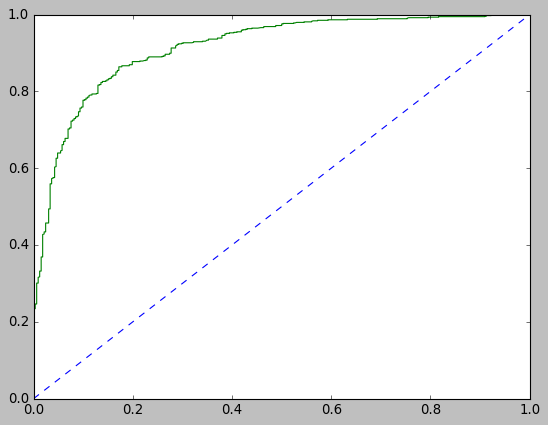

In [222]:
#AUC and ROC for the training data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % xgb_tun_train_auc)
# calculate roc curve
xgb_tun_train_fpr, xgb_tun_train_tpr, xgb_tun_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_train_fpr, xgb_tun_train_tpr)

In [223]:

## Performance Matrix on test data set
y_test_predict = xgbm_model_tun.predict(X_test)
model_score = xgbm_model_tun.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8318777292576419
[[ 92  38]
 [ 39 289]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.70       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



AUC: 0.894


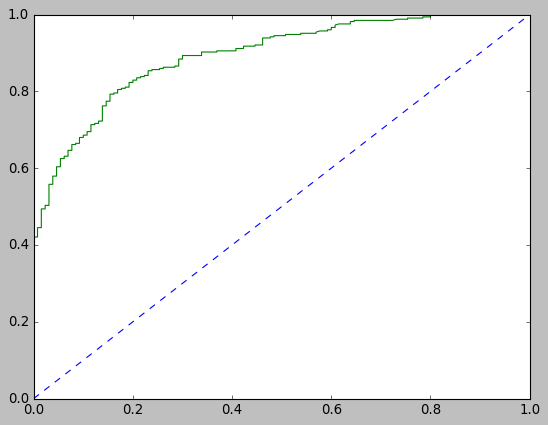

In [224]:
# AUC and ROC for the test data
# predict probabilities
probs = xgbm_model_tun.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
xgb_tun_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % xgb_tun_test_auc)
# calculate roc curve
xgb_tun_test_fpr, xgb_tun_test_tpr, xgb_tun_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(xgb_tun_test_fpr, xgb_tun_test_tpr)

In [225]:

pd.DataFrame({'Variable':X_train.columns,
              'Importance':xgbm_model_tun.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
4,Hague,0.320234
3,Blair,0.158256
5,Europe,0.138685
6,political.knowledge,0.114458
1,economic.cond.national,0.086892
0,age,0.065085
2,economic.cond.household,0.062624
7,gender,0.053766


Comparison of Different Models

ROC Curve for all the basic models on the Training data

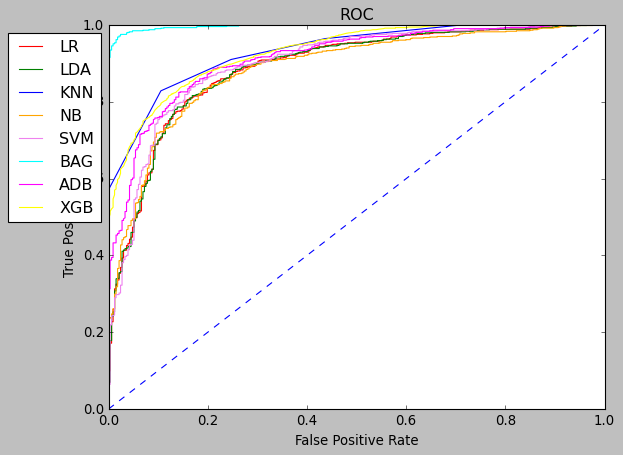

In [233]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_train_fpr, lr_train_tpr,color='red',label="LR")
plt.plot(lda_train_fpr,lda_train_tpr,color='green',label="LDA")
plt.plot(knn_train_fpr,knn_train_tpr,color='blue',label="KNN")
plt.plot(nb_train_fpr,nb_train_tpr,color='orange',label="NB")
plt.plot(svm_train_fpr,svm_train_tpr,color='violet',label="SVM")
plt.plot(bag_train_fpr,bag_train_tpr,color='cyan',label="BAG")
plt.plot(adb_train_fpr,adb_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')


ROC Curve for all the basic models on the Test data

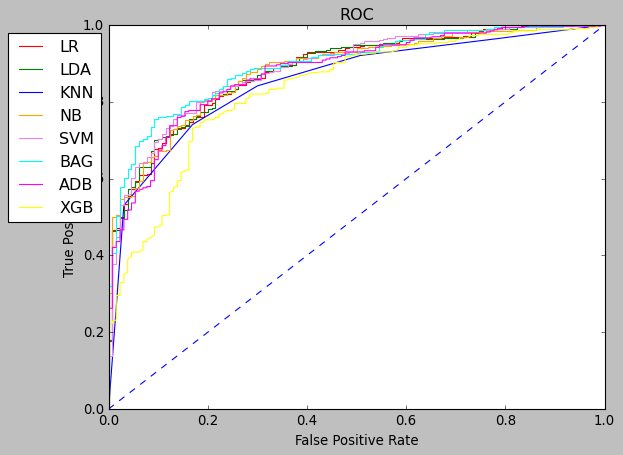

In [234]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_test_fpr, lr_test_tpr,color='red',label="LR")
plt.plot(lda_test_fpr,lda_test_tpr,color='green',label="LDA")
plt.plot(knn_test_fpr,knn_test_tpr,color='blue',label="KNN")
plt.plot(nb_test_fpr,nb_test_tpr,color='orange',label="NB")
plt.plot(svm_test_fpr,svm_test_tpr,color='violet',label="SVM")
plt.plot(bag_test_fpr,bag_test_tpr,color='cyan',label="BAG")
plt.plot(adb_test_fpr,adb_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

ROC Curve for all the tuned models on the Training data

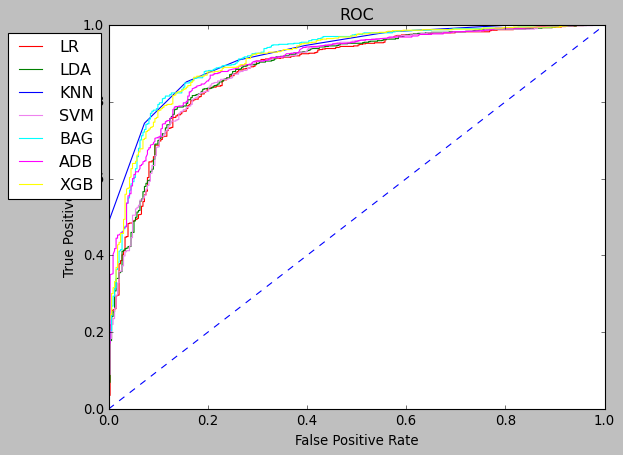

In [236]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_train_fpr, lr_tun_train_tpr,color='red',label="LR")
plt.plot(lda_tun_train_fpr,lda_tun_train_tpr,color='green',label="LDA")
plt.plot(knn_tun_train_fpr,knn_tun_train_tpr,color='blue',label="KNN")
plt.plot(svm_tun_train_fpr,svm_tun_train_tpr,color='violet',label="SVM")
plt.plot(bag_tun_train_fpr,bag_tun_train_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_train_fpr,adb_tun_train_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_train_fpr,xgb_tun_train_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

ROC Curve for all the tuned models on the Test data

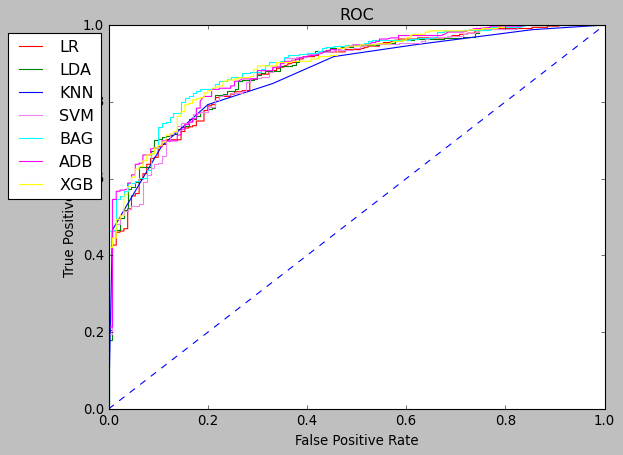

In [237]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(lr_tun_test_fpr, lr_tun_test_tpr,color='red',label="LR")
plt.plot(lda_tun_test_fpr,lda_tun_test_tpr,color='green',label="LDA")
plt.plot(knn_tun_test_fpr,knn_tun_test_tpr,color='blue',label="KNN")
plt.plot(svm_tun_test_fpr,svm_tun_test_tpr,color='violet',label="SVM")
plt.plot(bag_tun_test_fpr,bag_tun_test_tpr,color='cyan',label="BAG")
plt.plot(adb_tun_test_fpr,adb_tun_test_tpr,color='magenta',label="ADB")
plt.plot(xgb_tun_test_fpr,xgb_tun_test_tpr,color='yellow',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.), loc='best')

In this case we are not interested in any particular class as both the classes are of equal importance. We will consider accuracy for comparing the models.

Let's look at the performance of basic and tuned models. Below table shows the accuracy of train and test set for basic and tuned models.

 Basic                        Tuned

Model Train Test Train Test LR 0.8406 0.8231 0.8406 0.8231 LDA 0.8369 0.8187 0.8369 0.8187 KNN 0.8612 0.8013 0.8556 0.7969 NB 0.8331 0.8253 NA NA
SVM 0.8388 0.8187 0.8416 0.8231 BAG 0.9643 0.8340 0.8556 0.8340 AdaB 0.8472 0.8187 0.8369 0.8275 XgB 0.8528 0.7947 0.8566 0.8318

            Basic Model            Tuned
          AUC-ROC Score          AUC-ROC Score   
Model Train Test Train Test LR 0.889 0.883 0.886 0.878 LDA 0.889 0.884 0.889 0.884 KNN 0.933 0.855 0.925 0.870 NB 0.886 0.885 NA NA SVM 0.900 0.888 0.888 0.880 BAG 0.997 0.897 0.917 0.897 AdaBoost 0.913 0.879 0.902 0.892 XGBoost 0.931 0.835 0.915 0.894

Conclusion
From the above table it can be observed that apart from the basic bagging models all models look quite decent and can be deployed in production. For basic bagging model the train accuracy is 0.9643 while the test accuracy is 0.8340 which is very less than the train accuracy. This clearly indicates that the basic bagging model is highly overfit.However, top 3 performaing models seem to be KNN with an accuracy of 86%,XgBoost and Bagging models both with an accuracy of 85.66% stand at the second position while AdaBoost with 84.72 bags the third position

SMOTE

In [246]:
pip install --user imbalanced-learn

  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Using cached scikit_learn-0.24.2-cp38-cp38-win_amd64.whl (6.9 MB)



In [253]:
pip install imblearn -U

In [254]:
from imblearn.over_sampling import SMOTE

SMOTE is only applied on the train data set

In [256]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.values.ravel())

In [257]:
X_train_res.shape

(1470, 8)

XGBoost with SMOTE

In [258]:
import xgboost as xgb
XGB_SM_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_SM_model.fit(X_train_res, y_train_res)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [259]:
## Performance Matrix on train data set
y_train_predict = XGB_SM_model.predict(X_train_res)
model_score = XGB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8850340136054422
[[648  87]
 [ 82 653]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       735
           1       0.88      0.89      0.89       735

    accuracy                           0.89      1470
   macro avg       0.89      0.89      0.89      1470
weighted avg       0.89      0.89      0.89      1470



In [260]:
## Performance Matrix on test data set
y_test_predict = XGB_SM_model.predict(X_test)
model_score = XGB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8165938864628821
[[102  28]
 [ 56 272]]
              precision    recall  f1-score   support

           0       0.65      0.78      0.71       130
           1       0.91      0.83      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.81      0.79       458
weighted avg       0.83      0.82      0.82       458



KNN With SMOTE

In [261]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

In [262]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train_res)
model_score = KNN_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.882312925170068
[[686  49]
 [124 611]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       735
           1       0.93      0.83      0.88       735

    accuracy                           0.88      1470
   macro avg       0.89      0.88      0.88      1470
weighted avg       0.89      0.88      0.88      1470



In [263]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.759825327510917
[[102  28]
 [ 82 246]]
              precision    recall  f1-score   support

           0       0.55      0.78      0.65       130
           1       0.90      0.75      0.82       328

    accuracy                           0.76       458
   macro avg       0.73      0.77      0.73       458
weighted avg       0.80      0.76      0.77       458



AdaBoost With SMOTE

In [264]:
from sklearn.ensemble import AdaBoostClassifier


ADB_SM_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_SM_model.fit(X_train_res,y_train_res)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [265]:
## Performance Matrix on train data set
y_train_predict = ADB_SM_model.predict(X_train_res)
model_score = ADB_SM_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res, y_train_predict))

0.8448979591836735
[[628 107]
 [121 614]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       735
           1       0.85      0.84      0.84       735

    accuracy                           0.84      1470
   macro avg       0.85      0.84      0.84      1470
weighted avg       0.85      0.84      0.84      1470



In [266]:
## Performance Matrix on test data set
y_test_predict = ADB_SM_model.predict(X_test)
model_score = ADB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7925764192139738
[[103  27]
 [ 68 260]]
              precision    recall  f1-score   support

           0       0.60      0.79      0.68       130
           1       0.91      0.79      0.85       328

    accuracy                           0.79       458
   macro avg       0.75      0.79      0.76       458
weighted avg       0.82      0.79      0.80       458



Conclusion after SMOTE
                    Train Data Set                  Test Data Set

XGBoost .89 .82 KNN .88 .76 AdaBoost .84 .79

Using SMOTE, I think XGBoost still stands out and seems to be the best performing model.

Cross Validation on XGBoost Model

In [269]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(XGB_SM_model, X_train_res, y_train_res, cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:25:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.7755102 , 0.80952381, 0.87755102, 0.82312925, 0.84353741,
       0.84353741, 0.9047619 , 0.87755102, 0.83673469, 0.86394558])

In [270]:
scores = cross_val_score(XGB_SM_model, X_test, y_test, cv=10)
scores

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[08:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:25:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.80434783, 0.82608696, 0.7826087 , 0.76086957, 0.7826087 ,
       0.80434783, 0.89130435, 0.84782609, 0.84444444, 0.75555556])

Using 10 fold cross validation on the XGBoost model we have also got a train accuracy of 90% and test accuracy of 89%.

# Problem 2
In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
1.President Franklin D. Roosevelt in 1941
2.President John F. Kennedy in 1961
3.President Richard Nixon in 1963

In [274]:
pip install wordcloud

In [275]:
import nltk
import numpy as np   
import pandas as pd
from nltk.tokenize import sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [273]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to C:\Users\Chinmay
[nltk_data]     Nikhal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


True

In [276]:
from nltk.corpus import inaugural

In [277]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [278]:
doc1 = inaugural.raw('1941-Roosevelt.txt')

In [279]:
doc2 = inaugural.raw('1961-Kennedy.txt')

In [280]:
doc3 = inaugural.raw('1973-Nixon.txt')

In [281]:
speech_df = pd.DataFrame({'Speech':[doc1,doc2,doc3]})

In [282]:
speech_df.head(3)

,Speech
0,On each national day of inauguration since 178...
1,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [283]:
speech_df['totalwords'] = [len(x.split()) for x in speech_df['Speech'].tolist()]
speech_df.head()

,Speech,totalwords
0,On each national day of inauguration since 178...,1360
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819


In [284]:
speech_df['totalchars'] = speech_df['Speech'].str.len() ## this also includes spaces
speech_df.head()

,Speech,totalwords,totalchars
0,On each national day of inauguration since 178...,1360,7571
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,7618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,9991


In [288]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Chinmay
[nltk_data]     Nikhal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [289]:
sent = []

In [290]:
sent.append(len(sent_tokenize(doc1)))

In [291]:
sent.append(len(sent_tokenize(doc2)))

In [292]:
sent.append(len(sent_tokenize(doc3)))

In [293]:
sent

[68, 52, 68]

In [294]:
speech_df['totalsents'] =  sent ## this also includes spaces
speech_df.head()

,Speech,totalwords,totalchars,totalsents
0,On each national day of inauguration since 178...,1360,7571,68
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1390,7618,52
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1819,9991,68


Lower case conversation

In [297]:
speech_df['Speech'] = speech_df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
speech_df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

Removal of Punctuation

In [298]:
speech_df['Speech'] = speech_df['Speech'].str.replace('[^\w\s]','')
speech_df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

Removal of stop words

In [300]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Chinmay
[nltk_data]     Nikhal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [301]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)
speech_df['Speech_w/o_stop_words'] = speech_df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
speech_df.head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,Speech,totalwords,totalchars,totalsents,Speech_w/o_stop_words
0,on each national day of inauguration since 178...,1360,7571,68,national day inauguration since 1789 people re...
1,vice president johnson mr speaker mr chief jus...,1390,7618,52,vice president johnson mr speaker mr chief jus...
2,mr vice president mr speaker mr chief justice ...,1819,9991,68,mr vice president mr speaker mr chief justice ...


In [302]:
speech_df['totalwords_after_stop_words_removal'] = [len(x.split()) for x in speech_df['Speech_w/o_stop_words'].tolist()]
speech_df.head()

,Speech,totalwords,totalchars,totalsents,Speech_w/o_stop_words,totalwords_after_stop_words_removal
0,on each national day of inauguration since 178...,1360,7571,68,national day inauguration since 1789 people re...,627
1,vice president johnson mr speaker mr chief jus...,1390,7618,52,vice president johnson mr speaker mr chief jus...,693
2,mr vice president mr speaker mr chief justice ...,1819,9991,68,mr vice president mr speaker mr chief justice ...,833


In [303]:
for i in speech_df.index:
    print('\033[1m Top 3 words for President {} \033[0m'.format(i+1))
    #print(speech_df.loc[i,'Speech_w/o_stop_words'])
    all_words = nltk.tokenize.word_tokenize(speech_df.loc[i,'Speech_w/o_stop_words'])
    #print(all_words)
    words_freq = nltk.FreqDist(w.lower() for w in all_words)
    for word, frequency in words_freq.most_common(3):
        print('\'{}\' has {} occurances'.format(word,frequency))

 Top 3 words for President 1 
'nation' has 11 occurances
'know' has 10 occurances
'spirit' has 9 occurances
 Top 3 words for President 2 
'let' has 16 occurances
'us' has 12 occurances
'world' has 8 occurances
 Top 3 words for President 3 
'us' has 26 occurances
'let' has 22 occurances
'peace' has 19 occurances


In [304]:
df_president_1 = speech_df.iloc[:1,:]
df_president_1

,Speech,totalwords,totalchars,totalsents,Speech_w/o_stop_words,totalwords_after_stop_words_removal
0,on each national day of inauguration since 178...,1360,7571,68,national day inauguration since 1789 people re...,627


Word Cloud for President 1


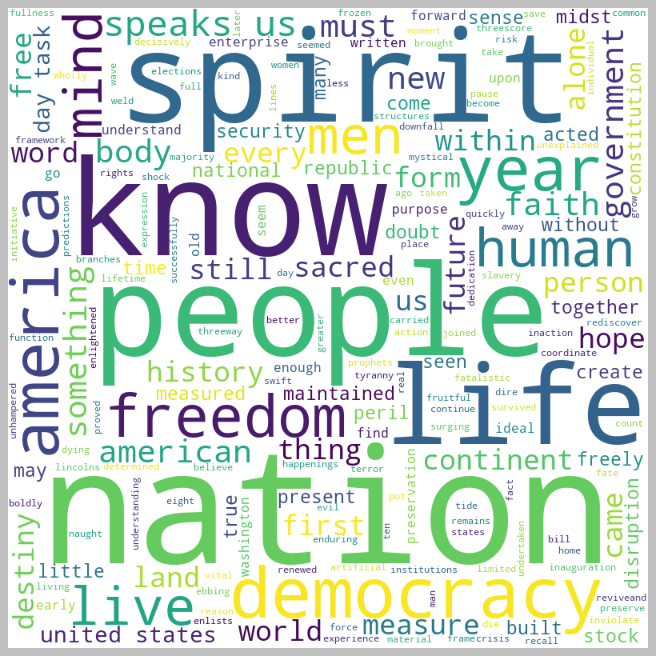

In [306]:
print('Word Cloud for President 1')
words = " ".join([str(i) for i in (df_president_1["Speech_w/o_stop_words"])])
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(words) 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [307]:
df_president_2 = speech_df.iloc[1:2,:]
df_president_2

,Speech,totalwords,totalchars,totalsents,Speech_w/o_stop_words,totalwords_after_stop_words_removal
1,vice president johnson mr speaker mr chief jus...,1390,7618,52,vice president johnson mr speaker mr chief jus...,693


Word Cloud for President 2


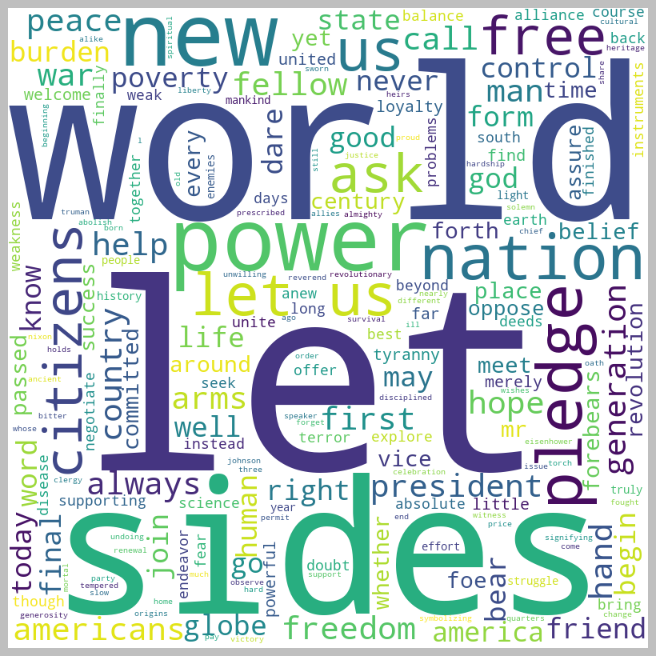

In [308]:
print('Word Cloud for President 2')
words = " ".join([str(i) for i in (df_president_2["Speech_w/o_stop_words"])])
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(words) 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [309]:
df_president_3 = speech_df.iloc[2:3,:]
df_president_3

,Speech,totalwords,totalchars,totalsents,Speech_w/o_stop_words,totalwords_after_stop_words_removal
2,mr vice president mr speaker mr chief justice ...,1819,9991,68,mr vice president mr speaker mr chief justice ...,833


Word Cloud for President 3


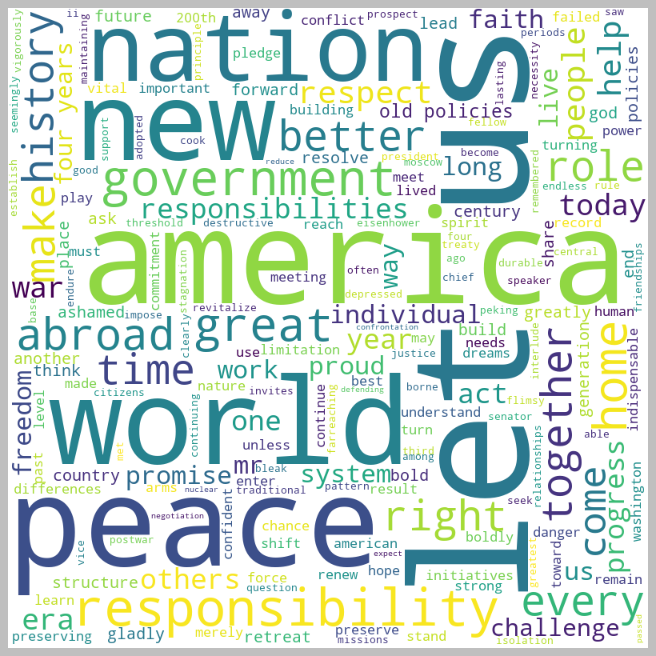

In [310]:
print('Word Cloud for President 3')
words = " ".join([str(i) for i in (df_president_3["Speech_w/o_stop_words"])])
wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            min_font_size = 10).generate(words) 
#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()